Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

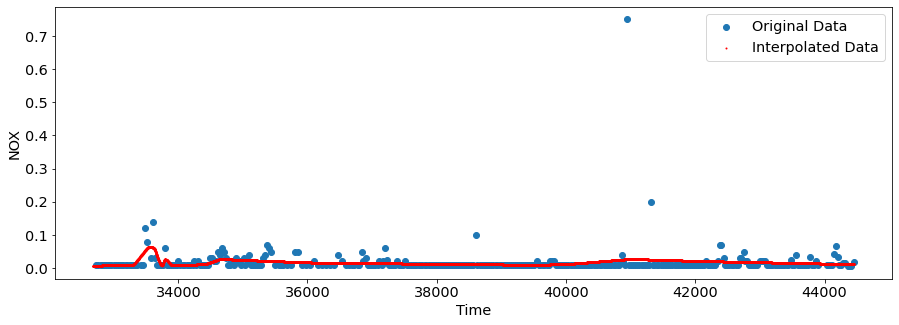

313/313 [==============================] - 0s 337us/step - loss: 2.8059e-18
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//NOX/saved_model/my_modelBB50_NOX')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/NOX_data/BB50.csv")
time = df['time'].values
NOX = df['NOX'].values
df

#Transform the normalized scale to real scale
NOX_min = 0.005
NOX_max = 0.75
time_min = 32723.46                        
time_max = 44454.42                            

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(NOX_max - NOX_min) + NOX_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, NOX*(NOX_max - NOX_min) + NOX_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('NOX')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.234042264
,0.239071688
,0.249471514
,0.254671427
,0.25987134
,0.265156498
,0.270185922
,0.275385835
,0.280585748
,0.285785661
,0.290985574
,0.296270732
,0.301300156
,0.306500069
,0.311699982
,0.316899895
,0.322099808
,0.327384966
,0.332499634
,0.342899461
,0.955210539
,0.957767873
,0.960410452
])
interpolation

array([[0.02161262],
       [0.02104772],
       [0.01987963],
       [0.01929559],
       [0.01871155],
       [0.01811793],
       [0.01747742],
       [0.01690711],
       [0.01634942],
       [0.01579172],
       [0.01523402],
       [0.01469077],
       [0.01418186],
       [0.0136557 ],
       [0.01312954],
       [0.01312015],
       [0.01317522],
       [0.0132312 ],
       [0.01328537],
       [0.01339552],
       [0.0119262 ],
       [0.01176414],
       [0.01159667]], dtype=float32)